<a href="https://colab.research.google.com/github/Hawraa313/brain-Tumor-classification/blob/main/ST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload kaggle.json
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"howrahalhddad","key":"6d64c19004e8419a7cf340ad2c88ccc9"}'}

In [ ]:
# Step 2: Set up the Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:00<00:00, 145MB/s]
100% 149M/149M [00:00<00:00, 163MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip -d /content/brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/brain_tumor_dataset/Trainin

In [ ]:
#check on the content of the dataset
import os
print("Contents of the dataset:")
print(os.listdir('/content/brain_tumor_dataset'))

Contents of the dataset:
['Training', 'Testing']


In [ ]:
#CNN model for training and testing
# Step 1: Import necessary libraries and prepare data generators (already done)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths for training and testing
train_path = '/content/brain_tumor_dataset/Training'
test_path = '/content/brain_tumor_dataset/Testing'

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification if needed
)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Apply another model
# Helper function to preprocess images
def preprocess_images(data_path, img_size=(128, 128)):
    images, labels = [], []
    for label, class_dir in enumerate(os.listdir(data_path)):
        class_path = os.path.join(data_path, class_dir)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize image
            images.append(img.flatten())  # Flatten image
            labels.append(label)  # Append label
    return np.array(images), np.array(labels)

# Define paths for training and testing
train_path = '/content/brain_tumor_dataset/Training'
test_path = '/content/brain_tumor_dataset/Testing'

# Preprocess images
X_train, y_train = preprocess_images(train_path)
X_test, y_test = preprocess_images(test_path)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred = rf_model.predict(X_test)

# Print metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9382151029748284

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       300
           1       0.85      0.93      0.89       306
           2       0.98      1.00      0.99       405
           3       0.97      0.83      0.89       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



In [ ]:
#Actuale model

# Step 2: Build the CNN model (already done)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.6381 - loss: 0.8854 - val_accuracy: 0.7735 - val_loss: 0.5493
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8501 - loss: 0.4037 - val_accuracy: 0.8352 - val_loss: 0.3949
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9059 - loss: 0.2692 - val_accuracy: 0.8688 - val_loss: 0.3261
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9239 - loss: 0.2145 - val_accuracy: 0.8993 - val_loss: 0.2262
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9377 - loss: 0.1683 - val_accuracy: 0.9230 - val_loss: 0.2163
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9605 - loss: 0.1141 - val_accuracy: 0.9550 - val_loss: 0.1367
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9644 - loss: 0.0982 - val_accuracy: 0.9390 - val_loss: 0.1771
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9725 - loss: 0.0833 - val_accuracy: 0.956

In [ ]:
# Step 5: Test the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 390ms/step - accuracy: 0.9621 - loss: 0.1347
Test Accuracy: 0.97


In [ ]:
# Save the entire model
#Save the trained model for future use
model.save('brain_tumor_classifier.h5')


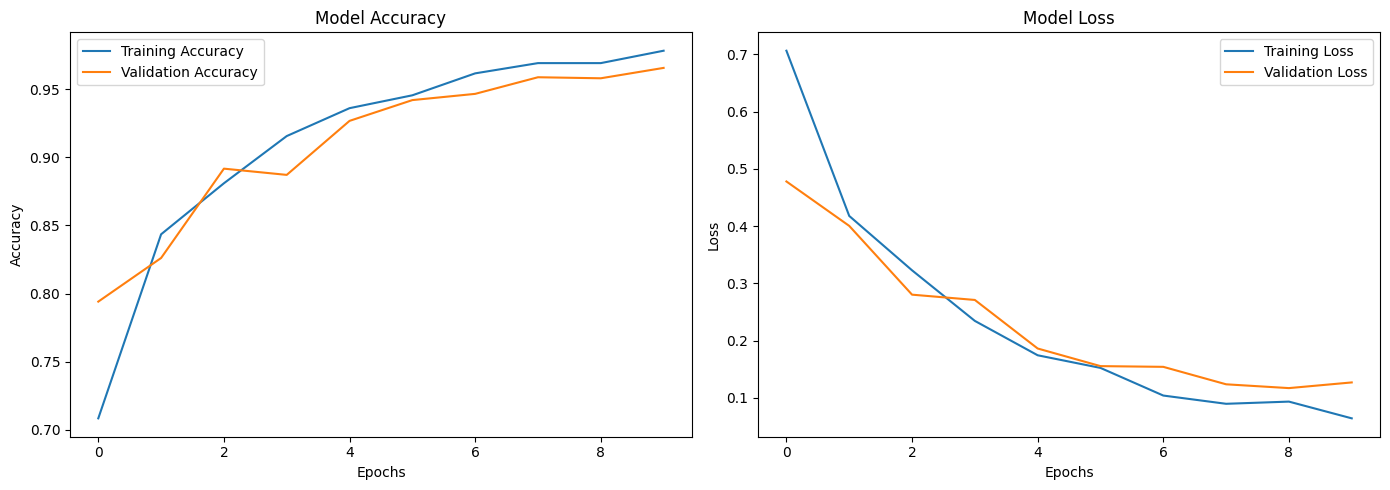

In [ ]:
#Visualize Training Results
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [ ]:
#save the model
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('brain_tumor_classifier.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    # Load the image with target size as per model input
    img = image.load_img(img_path, target_size=(128, 128))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image (scale pixel values to [0, 1])
    img_array /= 255.0
    return img_array

def display_image(img_path):
    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

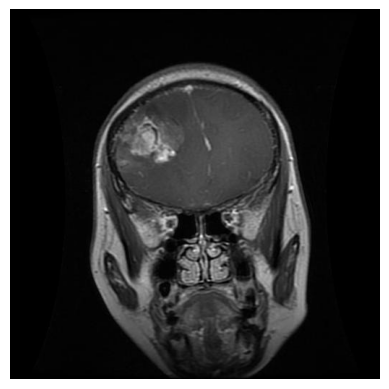

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted class: glioma with probability 1.00


In [ ]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Training/glioma/Tr-glTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')


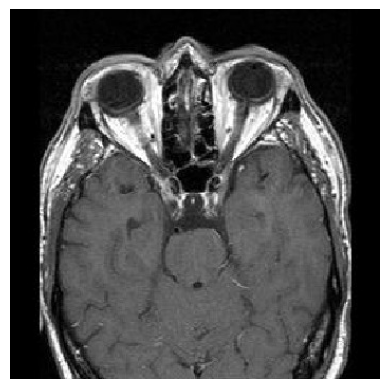

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: notumor with probability 1.00


In [ ]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Training/notumor/Tr-noTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')


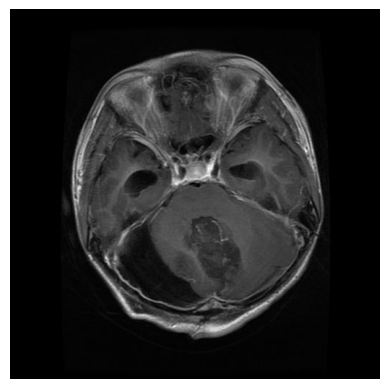

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: glioma with probability 1.00


In [ ]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Testing/glioma/Te-glTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')


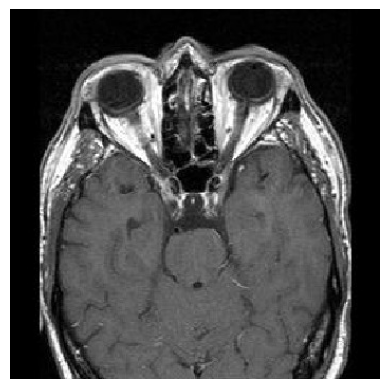

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: notumor with probability 1.00


In [ ]:
# Path to the new image you want to predict
img_path = '/content/brain_tumor_dataset/Training/notumor/Tr-noTr_0000.jpg'

# Preprocess and display the image
img_array = preprocess_image(img_path)
display_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest probability
predicted_class_prob = prediction[0][predicted_class_index]

# Print the result with class labels
class_labels = list(train_generator.class_indices.keys())  # Retrieve class labels from the training generator
print(f'Predicted class: {class_labels[predicted_class_index]} with probability {predicted_class_prob:.2f}')
